# Layer selection for audio tagging with pretrained models

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os

### ESC-50 dataset

In [2]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl_downstream"
exp_list = os.listdir(exp_root)
to_move = ["001_esc50_42","002_esc50_42", "003_esc50_42", "004_esc50_42", "060_esc50_42"] # + [f"0{i}_esc50_42" for i in range(40,46)]
for e in to_move:
    if e in exp_list:
        exp_list.remove(e)
print(exp_list)


['034_esc50_42', '024_esc50_42', '043_esc50_42', '014_esc50_42', '053_esc50_42', '023_esc50_42', '033_esc50_42', '054_esc50_42', '044_esc50_42', '013_esc50_42', '042_esc50_42', '015_esc50_42', '052_esc50_42', '005_esc50_42', '035_esc50_42', '025_esc50_42', '055_esc50_42', '045_esc50_42', '012_esc50_42', '022_esc50_42', '032_esc50_42', '021_esc50_42', '031_esc50_42', '056_esc50_42', '059_esc50_42', '011_esc50_42', '049_esc50_42', '039_esc50_42', '036_esc50_42', '026_esc50_42', '029_esc50_42', '016_esc50_42', '019_esc50_42', '041_esc50_42', '009_esc50_42', '006_esc50_42', '051_esc50_42', '058_esc50_42', '057_esc50_42', '010_esc50_42', '047_esc50_42', '048_esc50_42', '020_esc50_42', '030_esc50_42', '018_esc50_42', '017_esc50_42', '040_esc50_42', '007_esc50_42', '008_esc50_42', '050_esc50_42', '037_esc50_42', '038_esc50_42', '028_esc50_42', '027_esc50_42']


In [3]:
hubert_acc = []
ast_acc = []
wav_acc = []
mert_acc = []

layer_idx_hub=[]
layer_idx_ast=[]
layer_idx_wav=[]
layer_idx_mert=[]
for exp in exp_list:
    exp_id = exp[:3]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    layer_idx = cfg["model"]["use_layer_indices"][0]

    with open(os.path.join(exp_path,"metrics/metrics_summary_foldesc50.json"),"r") as fh:
        metrics = json.load(fh)

    if model_type == "hubert":
        hubert_acc.append(metrics["acc"]["mean"])
        layer_idx_hub.append(L_idx)
    elif model_type == "ast":
        ast_acc.append(metrics["acc"]["mean"])
        layer_idx_ast.append(layer_idx)
    elif model_type == "wavlm":
        wav_acc.append(metrics["acc"]["mean"])
        layer_idx_wav.append(layer_idx)
    elif model_type == "mert":
        mert_acc.append(metrics["acc"]["mean"])
        layer_idx_mert.append(layer_idx)
    

NameError: name 'L_idx' is not defined

(0.0, 1.0)

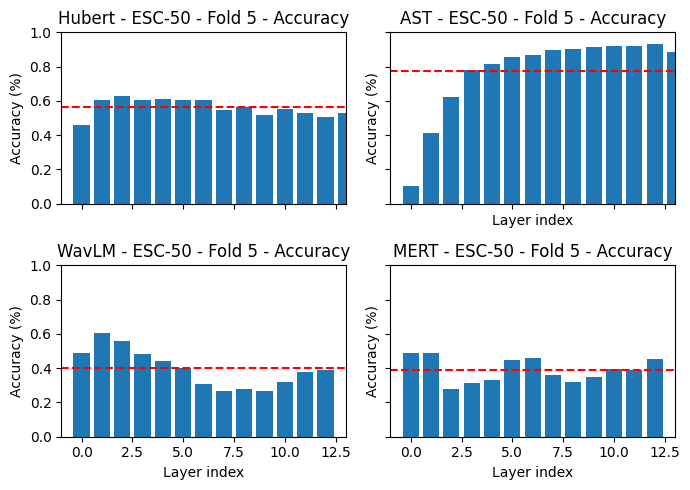

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, layout='tight', figsize=(7,5), sharex=True, sharey=True)

hubert_acc = np.array(hubert_acc)
ast_acc = np.array(ast_acc)
wav_acc = np.array(wav_acc)
mert_acc = np.array(mert_acc)

ax = axs[0,0]
ax.bar(layer_idx_hub, hubert_acc)
ax.hlines([hubert_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_ylim(0., 1.)
ax.set_xlim([-1,len(hubert_acc)])
ax.set_ylabel("Accuracy (%)")
ax.set_title('Hubert - ESC-50 - Fold 5 - Accuracy')

ax = axs[0,1]
ax.bar(layer_idx_ast, ast_acc)
ax.hlines([ast_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("L index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('AST - ESC-50 - Fold 5 - Accuracy')
ax.set_ylim(0., 1.)

ax = axs[1,0]
ax.bar(layer_idx_wav, wav_acc)
ax.hlines([wav_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("L index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('WavLM - ESC-50 - Fold 5 - Accuracy')
ax.set_ylim(0., 1.)

ax = axs[1,1]
ax.bar(layer_idx_wav, mert_acc)
ax.hlines([mert_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(mert_acc)])
ax.set_xlabel("L index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('MERT - ESC-50 - Fold 5 - Accuracy')
ax.set_ylim(0., 1.)


## VocalSet

### Probing performance for each layer

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [2]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl_downstream_vocalset"
exp_list = os.listdir(exp_root)
# exp_list = [f"0{i:02d}_vocalset_42" for i in range(1,28)]
# to_move = ["014_vocalset_42"] # + [f"0{i}_esc50_42" for i in range(40,46)]
# for e in to_move:
#     if e in exp_list:
#         exp_list.remove(e)
# print(exp_list)

In [3]:
hubert_acc = []
ast_acc = []
wav_acc = []
mert_acc = []

layer_idx_hub=[]
layer_idx_ast=[]
layer_idx_wav=[]
layer_idx_mert=[]
for exp in exp_list:
    exp_id = exp[:3]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    layer_idx = cfg["model"]["use_layer_indices"][0]

    if os.path.exists(os.path.join(exp_path,"metrics/metrics_summary_foldvocalset.json")):
        with open(os.path.join(exp_path,"metrics/metrics_summary_foldvocalset.json"),"r") as fh:
            metrics = json.load(fh)

        if model_type == "hubert":
            hubert_acc.append(metrics["acc"]["mean"])
            layer_idx_hub.append(layer_idx)
        elif model_type == "ast":
            ast_acc.append(metrics["acc"]["mean"])
            layer_idx_ast.append(layer_idx)
        elif model_type == "wavlm":
            wav_acc.append(metrics["acc"]["mean"])
            layer_idx_wav.append(layer_idx)
        elif model_type == "mert":
            mert_acc.append(metrics["acc"]["mean"])
            layer_idx_mert.append(layer_idx)




In [4]:
def sort_layers(acc_list, idx_list):
    layer_idx = np.array(idx_list)
    acc = np.array(acc_list)
    idx_srt = np.argsort(layer_idx)
    layer_idx_srt = layer_idx[idx_srt]
    acc_srt = acc[idx_srt]
    
    return acc_srt, layer_idx_srt

hubert_acc, layer_idx_hub = sort_layers(hubert_acc, layer_idx_hub)
wav_acc, layer_idx_wav = sort_layers(wav_acc, layer_idx_wav)
mert_acc, layer_idx_mert = sort_layers(mert_acc, layer_idx_mert)
ast_acc, layer_idx_ast = sort_layers(ast_acc, layer_idx_ast)

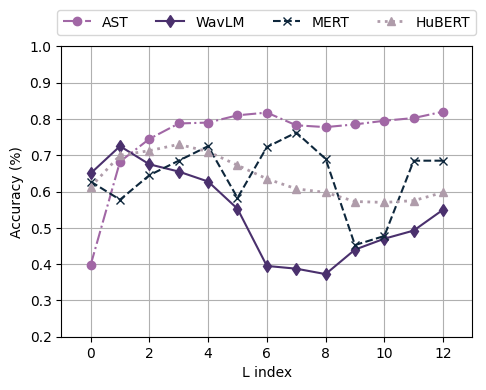

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, layout='tight', figsize=(5,4))

# hubert_acc = np.array(hubert_acc)
# ast_acc = np.array(ast_acc)
# wav_acc = np.array(wav_acc)
# mert_acc = np.array(mert_acc)
# print(mert_acc)

palette = ["#AF9CAA", "#A167A5", "#4A306D", "#0E273C", "#E8D7F1"]

dataset = "VocalSet"

ax.plot(layer_idx_ast, ast_acc, linestyle="-.", marker="o", color=palette[1],  label="AST")
ax.plot(layer_idx_wav, wav_acc, linestyle="-", marker="d", color=palette[2],  label="WavLM")
ax.plot(layer_idx_mert, mert_acc, linestyle="--", marker="x", color=palette[3],  label="MERT")
ax.plot(layer_idx_hub, hubert_acc, linestyle=":", marker="^", color=palette[0], label="HuBERT", linewidth=2)

ax.set_ylim(0.2, 1.)
ax.set_xlim([-1,len(hubert_acc)])
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("L index")
ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
ax.grid()
fig.savefig(f'./figs/layer_probing.pdf', transparent=True)
plt.show()


### Accuracy for the selected layers

In [6]:
print("="*30)
print("AST")
print("="*30)
for idx in [6,12]:
    print(f"Layer = {idx} - Acc = {ast_acc[idx]*100:2.1f}")
print("="*30)
print("WAVLM")
print("="*30)
for idx in [1,12]:
    print(f"Layer = {idx} - Acc = {wav_acc[idx]*100:2.1f}")
print("="*30)
print("HUBERT")
print("="*30)
for idx in [3,12]:
    print(f"Layer = {idx} - Acc = {hubert_acc[idx]*100:2.1f}")
print("="*30)
print("MERT")
print("="*30)
for idx in [4,7]:
    print(f"Layer = {idx} - Acc = {mert_acc[idx]*100:2.1f}")
print("="*30)

AST
Layer = 6 - Acc = 81.8
Layer = 12 - Acc = 82.0
WAVLM
Layer = 1 - Acc = 72.5
Layer = 12 - Acc = 55.0
HUBERT
Layer = 3 - Acc = 73.0
Layer = 12 - Acc = 59.8
MERT
Layer = 4 - Acc = 72.5
Layer = 7 - Acc = 76.2


### Evaluation of probing of the SAE representation

In [7]:
exp_root = "/lium/raid-b/tmario/train/SAE/sae_downstream"
exp_list = os.listdir(exp_root)
to_remove = ["0164", "0174", "0184", "0194", "0204", "0062", "00612", "0072", "00712", "0082", "00812", "0092", "00912", "0102", "01012"]
exp_list = [e for e in exp_list if e.split('_')[0] not in to_remove]
dataset = "vocalset"
exp_list = [e for e in exp_list if dataset in e]

In [8]:
hubert_acc_dict = {"layer_3": {"sparsity": [], "acc": []},
                   "layer_12": {"sparsity": [], "acc": []}}

ast_acc_dict = {"layer_6": {"sparsity": [], "acc": []},
           "layer_12": {"sparsity": [], "acc": []}}

wav_acc_dict = {"layer_1": {"sparsity": [], "acc": []},
           "layer_12": {"sparsity": [], "acc": []}}

mert_acc_dict = {"layer_4": {"sparsity": [], "acc": []},
           "layer_7": {"sparsity": [], "acc": []}}

for exp in exp_list:
    exp_id = exp.split("_")[0]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    layer_idx = cfg["model"]["layer_indices"][cfg["sae_index"]]
    sparsity = cfg["model"]["sparsity"]
    
    if os.path.exists(os.path.join(exp_path,"metrics/metrics_summary_foldvocalset.json")):
        with open(os.path.join(exp_path,"metrics/metrics_summary_foldvocalset.json"),"r") as fh:
            metrics = json.load(fh)

        if model_type == "hubert":
            hubert_acc_dict[f"layer_{layer_idx}"]["acc"].append(metrics["acc"]["mean"])
            hubert_acc_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
            #hubert_acc_dict.append(metrics["acc"]["mean"])
            #layer_idx_hub.append(layer_idx)
        elif model_type == "ast":
            ast_acc_dict[f"layer_{layer_idx}"]["acc"].append(metrics["acc"]["mean"])
            ast_acc_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
        elif model_type == "wavlm":
            wav_acc_dict[f"layer_{layer_idx}"]["acc"].append(metrics["acc"]["mean"])
            wav_acc_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
        elif model_type == "mert":
            mert_acc_dict[f"layer_{layer_idx}"]["acc"].append(metrics["acc"]["mean"])
            mert_acc_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)


In [9]:
import pprint

pprint.pprint(hubert_acc_dict)
pprint.pprint(ast_acc_dict)
pprint.pprint(wav_acc_dict)
pprint.pprint(mert_acc_dict)


{'layer_12': {'acc': [0.6125, 0.56, 0.5625, 0.505, 0.58, 0.615],
              'sparsity': [0.85, 0.9, 0.95, 0.99, 0.8, 0.75]},
 'layer_3': {'acc': [0.7125, 0.6975, 0.7, 0.6725, 0.665, 0.7125],
             'sparsity': [0.85, 0.95, 0.75, 0.9, 0.75, 0.8]}}
{'layer_12': {'acc': [0.7625, 0.82, 0.8225, 0.835, 0.81, 0.8225],
              'sparsity': [0.99, 0.8, 0.75, 0.85, 0.9, 0.95]},
 'layer_6': {'acc': [0.8075, 0.815, 0.78, 0.8025, 0.8, 0.825],
             'sparsity': [0.9, 0.8, 0.99, 0.75, 0.95, 0.85]}}
{'layer_1': {'acc': [0.74, 0.72, 0.75, 0.7225, 0.725, 0.69],
             'sparsity': [0.8, 0.9, 0.85, 0.95, 0.75, 0.99]},
 'layer_12': {'acc': [0.52, 0.4575, 0.5075, 0.5375, 0.5025, 0.525],
              'sparsity': [0.75, 0.99, 0.85, 0.95, 0.8, 0.9]}}
{'layer_4': {'acc': [0.7125, 0.6975, 0.7075, 0.6975, 0.72, 0.625],
             'sparsity': [0.8, 0.9, 0.85, 0.95, 0.75, 0.99]},
 'layer_7': {'acc': [0.71, 0.7075, 0.675, 0.695, 0.685, 0.705],
             'sparsity': [0.8, 0.9, 0.99, 0

In [10]:
def sort_sparsity(acc_dict):
    for k, v in acc_dict.items():
        sparsity = np.array(v["sparsity"])
        acc = np.array(v["acc"])
        idx_srt = np.argsort(sparsity)
        sparsity_srt = sparsity[idx_srt]
        acc_srt = acc[idx_srt]

        acc_dict[k] = {"acc": acc_srt, "sparsity": sparsity_srt}
    
    return acc_dict

wav_acc_dict = sort_sparsity(wav_acc_dict)
hubert_acc_dict = sort_sparsity(hubert_acc_dict)
mert_acc_dict = sort_sparsity(mert_acc_dict)
ast_acc_dict = sort_sparsity(ast_acc_dict)

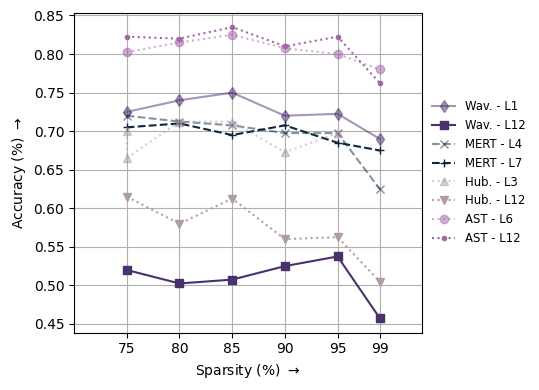

In [11]:
plt.rcParams['text.usetex'] = False

# fig, ax = plt.subplots(nrows=1, ncols=1, layout='tight', figsize=(5,4))
fig, ax = plt.subplots(nrows=1, ncols=1, layout='tight', figsize=(5.5,4))
# ax = axs[1]
palette = ["#AF9CAA", "#A167A5", "#4A306D", "#0E273C", "#E8D7F1"]
markers = [
    ["o", "."],
    ["d", "s"],
    ["x", "+"],
    ["^", "v"]
]
dataset = "VocalSet"


for ii, (k, v) in enumerate(wav_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle="-", marker=markers[1][ii], color=palette[2], alpha=0.5 if ii ==0 else 1,  label=f"Wav. - L{layer_index}")
for ii, (k, v) in enumerate(mert_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle="--", marker=markers[2][ii], color=palette[3], alpha=0.5 if ii ==0 else 1,  label=f"MERT - L{layer_index}")
for ii, (k, v) in enumerate(hubert_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle=":", marker=markers[3][ii], color=palette[0], alpha=0.5 if ii ==0 else 1,  label=f"Hub. - L{layer_index}")
for ii, (k, v) in enumerate(ast_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, (v["acc"]), linestyle=":", marker=markers[0][ii], color=palette[1], alpha=0.5 if ii ==0 else 1,  label=f"AST - L{layer_index}")

# ax.set_ylim(-0.05, .2)
ax.set_xlim([70,103])
ax.set_xticks([75, 80, 85, 90, 95, 99])
ax.set_xticklabels([f"{s}" for s in [75, 80, 85, 90, 95, 99]])

ax.set_ylabel(r"Accuracy (%) $\rightarrow$")
ax.set_xlabel(r"Sparsity (%) $\rightarrow$")
ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)

ax.grid()
fig.savefig(f'./figs/sae_probing.pdf', transparent=True)
# plt.show()


### Reconstruction quality evaluation

In [12]:
import h5py

exp_root = "/lium/raid-b/tmario/train/SAE/ssl"
exp_list = os.listdir(exp_root)

exp_select = [f"{i:03d}" for i in range(6)] + [f"{i:03d}" for i in range(11,16)] + [f"{i:03d}" for i in range(21,35)]
print(exp_select)
exp_list = [e for e in exp_list if e.split('_')[0] in exp_select]
dataset = "vocalset"
exp_list = [e for e in exp_list if dataset in e]

['000', '001', '002', '003', '004', '005', '011', '012', '013', '014', '015', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034']


In [13]:
hubert_mse_dict = {"layer_3": {"sparsity": [], "mse": []},
                   "layer_12": {"sparsity": [], "mse": []}}

ast_mse_dict = {"layer_6": {"sparsity": [], "mse": []},
           "layer_12": {"sparsity": [], "mse": []}}

wav_mse_dict = {"layer_1": {"sparsity": [], "mse": []},
           "layer_12": {"sparsity": [], "mse": []}}

mert_mse_dict = {"layer_4": {"sparsity": [], "mse": []},
           "layer_7": {"sparsity": [], "mse": []}}


for exp in exp_list:
    exp_id = exp.split("_")[0]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    sparsity = cfg["model"]["sparsity"]
    files = os.listdir(exp_path)

    rep_file = os.path.join(exp_path,[f for f in files if f.startswith("extract_rep")][0])
    sae_rep = {}
    with h5py.File(rep_file, "r") as fh:
        for k in fh.keys():
            data = fh[k][()]
            sae_rep[k] = data
            if k == "mse":
                mse_avg = np.mean(data,axis=0)
                mse_var = np.std(data, axis=0)

    for ii, layer_idx in enumerate(cfg["model"]["layer_indices"]):  
        if model_type == "hubert":
            hubert_mse_dict[f"layer_{layer_idx}"]["mse"].append(mse_avg[ii])
            hubert_mse_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
        elif model_type == "ast":
            ast_mse_dict[f"layer_{layer_idx}"]["mse"].append(mse_avg[ii])
            ast_mse_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
        elif model_type == "wavlm":
            wav_mse_dict[f"layer_{layer_idx}"]["mse"].append(mse_avg[ii])
            wav_mse_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)
        elif model_type == "mert":
            mert_mse_dict[f"layer_{layer_idx}"]["mse"].append(mse_avg[ii])
            mert_mse_dict[f"layer_{layer_idx}"]["sparsity"].append(sparsity)


In [14]:
def sort_sparsity_mse(mse_dict):
    for k, v in mse_dict.items():
        sparsity = np.array(v["sparsity"])
        mse = np.array(v["mse"])
        idx_srt = np.argsort(sparsity)
        sparsity_srt = sparsity[idx_srt]
        mse_srt = mse[idx_srt]

        mse_dict[k] = {"mse": mse_srt, "sparsity": sparsity_srt}
    
    return mse_dict

wav_mse_dict = sort_sparsity_mse(wav_mse_dict)
hubert_mse_dict = sort_sparsity_mse(hubert_mse_dict)
mert_mse_dict = sort_sparsity_mse(mert_mse_dict)
ast_mse_dict = sort_sparsity_mse(ast_mse_dict)

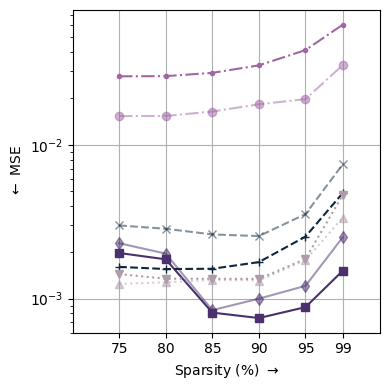

In [15]:
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots(nrows=1, ncols=1, layout='tight', figsize=(4,4))

palette = ["#AF9CAA", "#A167A5", "#4A306D", "#0E273C", "#E8D7F1"]
markers = [
    ["o", "."],
    ["d", "s"],
    ["x", "+"],
    ["^", 'v']
]
dataset = "VocalSet"
for ii, (k, v) in enumerate(wav_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, v["mse"], linestyle="-", marker=markers[1][ii], color=palette[2], alpha=0.5 if ii ==0 else 1, label=f"WavLM - L {layer_index}")
for ii, (k, v) in enumerate(mert_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  v["mse"], linestyle="--", marker=markers[2][ii], color=palette[3], alpha=0.5 if ii ==0 else 1,  label=f"MERT - L {layer_index}")
for ii, (k, v) in enumerate(hubert_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  v["mse"], linestyle=":", marker=markers[3][ii], color=palette[0], alpha=0.5 if ii ==0 else 1, label=f"HuBERT - L {layer_index}")
for ii, (k, v) in enumerate(ast_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, v["mse"], linestyle="-.", marker=markers[0][ii], color=palette[1], alpha=0.5 if ii ==0 else 1, label=f"AST - L {layer_index}")

ax.set_yscale('log')
ax.set_xlim([70,103])

ax.set_xticks([75, 80, 85, 90, 95, 99])
ax.set_xticklabels([f"{s}" for s in [75, 80, 85, 90, 95, 99]])

# ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)

ax.set_ylabel(r"$\leftarrow$ MSE")
ax.set_xlabel(r"Sparsity (%) $\rightarrow$")    
ax.grid()
fig.savefig(f'./figs/sae_mse.pdf', transparent=True)
plt.show()


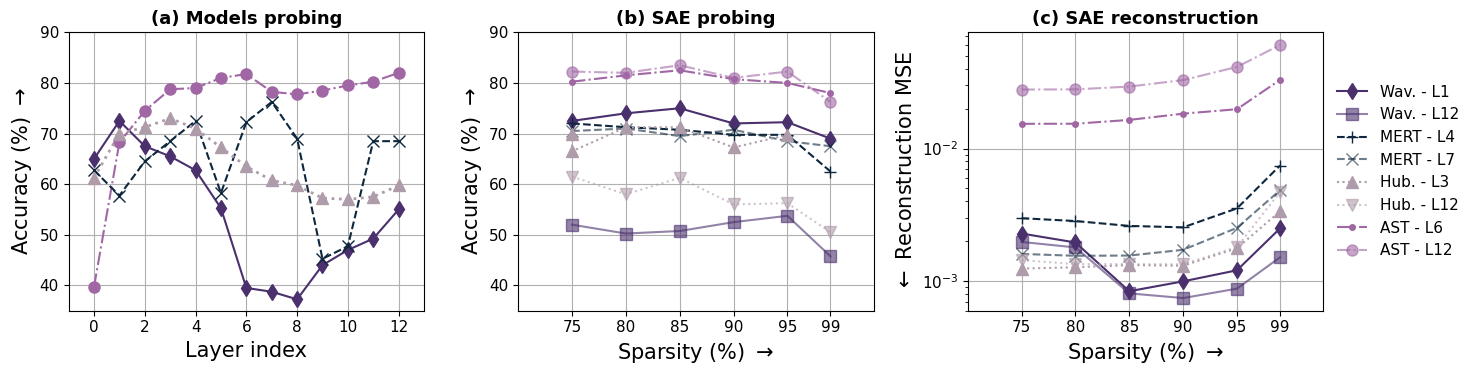

In [16]:
plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 15})
# fig, ax = plt.subplots(nrows=1, ncols=1, layout='tight', figsize=(5,4))
fig, axs = plt.subplots(nrows=1, ncols=3, layout='tight', figsize=(15,4))
msz=8
ax = axs[0]
ax.plot(layer_idx_ast, ast_acc, linestyle="-.", marker="o", color=palette[1],  label="AST", markersize=msz)
ax.plot(layer_idx_wav, wav_acc, linestyle="-", marker="d", color=palette[2],  label="WavLM", markersize=msz)
ax.plot(layer_idx_mert, mert_acc, linestyle="--", marker="x", color=palette[3],  label="MERT", markersize=msz)
ax.plot(layer_idx_hub, hubert_acc, linestyle=":", marker="^", color=palette[0], label="HuBERT", linewidth=2, markersize=msz)

#ax.set_ylim(0.2, 1.)
ax.set_xlim([-1,len(hubert_acc)])
ax.set_ylabel(r"Accuracy (%) $\rightarrow$")
ax.set_xlabel("Layer index")
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels([f"{int(s*100)}" for s in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])
ax.set_ylim((0.35, 0.90))
ax.tick_params(axis='both', which='major', labelsize=11)
# ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
ax.grid()
ax.set_title("(a) Models probing", weight='bold')
# fig.savefig(f'./figs/layer_probing.pdf', transparent=True)
# plt.show()

ax = axs[1]
palette = ["#AF9CAA", "#A167A5", "#4A306D", "#0E273C", "#E8D7F1"]
markers = [
    [".", "o"],
    ["d", "s"],
    ["+", "x"],
    ["^", "v"]
]
dataset = "VocalSet"


for ii, (k, v) in enumerate(wav_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle="-", marker=markers[1][ii], color=palette[2], alpha=0.6 if ii ==1 else 1,  label=f"Wav. - L{layer_index}", markersize=msz)
for ii, (k, v) in enumerate(mert_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle="--", marker=markers[2][ii], color=palette[3], alpha=0.6 if ii ==1 else 1,  label=f"MERT - L{layer_index}",markersize=msz)
for ii, (k, v) in enumerate(hubert_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  (v["acc"]), linestyle=":", marker=markers[3][ii], color=palette[0], alpha=0.6 if ii ==1 else 1,  label=f"Hub. - L{layer_index}", markersize=msz)
for ii, (k, v) in enumerate(ast_acc_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, (v["acc"]), linestyle="-.", marker=markers[0][ii], color=palette[1], alpha=0.6 if ii ==1 else 1,  label=f"AST - L{layer_index}", markersize=msz)

# ax.set_ylim(-0.05, .2)
ax.set_xlim([70,103])
ax.set_xticks([75, 80, 85, 90, 95, 99])
ax.set_xticklabels([f"{s}" for s in [75, 80, 85, 90, 95, 99]])
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels([f"{int(s*100)}" for s in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])
ax.set_ylim((0.35, 0.9))
ax.set_ylabel(r"Accuracy (%) $\rightarrow$")
ax.set_xlabel(r"Sparsity (%) $\rightarrow$")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_title("(b) SAE probing", weight='bold')
ax.grid()

ax = axs[2]
for ii, (k, v) in enumerate(wav_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, v["mse"], linestyle="-", marker=markers[1][ii], color=palette[2], alpha=0.6 if ii ==1 else 1, label=f"Wav. - L{layer_index}", markersize=msz)
for ii, (k, v) in enumerate(mert_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  v["mse"], linestyle="--", marker=markers[2][ii], color=palette[3], alpha=0.6 if ii ==1 else 1,  label=f"MERT - L{layer_index}", markersize=msz)
for ii, (k, v) in enumerate(hubert_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100,  v["mse"], linestyle=":", marker=markers[3][ii], color=palette[0], alpha=0.6 if ii ==1 else 1, label=f"Hub. - L{layer_index}", markersize=msz)
for ii, (k, v) in enumerate(ast_mse_dict.items()):
    layer_index = int(k.split("_")[-1])
    ax.plot(v["sparsity"]*100, v["mse"], linestyle="-.", marker=markers[0][ii], color=palette[1], alpha=0.6 if ii ==1 else 1, label=f"AST - L{layer_index}", markersize=msz)

ax.set_yscale('log')
ax.set_xlim([70,103])

ax.set_xticks([75, 80, 85, 90, 95, 99])
ax.set_xticklabels([f"{s}" for s in [75, 80, 85, 90, 95, 99]])

# ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)

ax.set_ylabel(r"$\leftarrow$ Reconstruction MSE")
ax.set_xlabel(r"Sparsity (%) $\rightarrow$")    
ax.grid()
ax.set_title("(c) SAE reconstruction", weight='bold')

ax.tick_params(axis='both', which='major', labelsize=11)

ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=False)

for ax in axs:
    ax.title.set_fontsize(13)


fig.savefig(f'./figs/sae_eval.pdf', transparent=True)
plt.show()




### Timit

In [ ]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl_downstream_timit"
exp_list = os.listdir(exp_root)
exp_list = [f"0{i:02d}_timit_42" for i in range(1,20)]
to_move = ["013_timit_42"] # + [f"0{i}_esc50_42" for i in range(40,46)]
for e in to_move:
    if e in exp_list:
        exp_list.remove(e)
print(exp_list)

['001_timit_42', '002_timit_42', '003_timit_42', '004_timit_42', '005_timit_42', '006_timit_42', '007_timit_42', '008_timit_42', '009_timit_42', '010_timit_42', '011_timit_42', '012_timit_42', '014_timit_42', '015_timit_42', '016_timit_42', '017_timit_42', '018_timit_42', '019_timit_42']


In [ ]:
hubert_acc = []
ast_acc = []
wav_acc = []
layer_idx_hub=[]
layer_idx_ast=[]
layer_idx_wav=[]
for exp in exp_list:
    exp_id = exp[:3]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    layer_idx = cfg["model"]["use_layer_indices"][0]

    with open(os.path.join(exp_path,"metrics/metrics_summary_foldtimit.json"),"r") as fh:
        metrics = json.load(fh)

    if model_type == "hubert":
        hubert_acc.append(metrics["acc"]["mean"])
        layer_idx_hub.append(layer_idx)
    elif model_type == "ast":
        ast_acc.append(metrics["acc"]["mean"])
        layer_idx_ast.append(layer_idx)
    elif model_type == "wavlm":
        wav_acc.append(metrics["acc"]["mean"])
        layer_idx_wav.append(layer_idx)
    

FileNotFoundError: [Errno 2] No such file or directory: '/lium/raid-b/tmario/train/SAE/ssl_downstream_timit/014_timit_42/metrics/metrics_summary_foldtimit.json'

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, layout='tight', figsize=(7,5), sharex=True)

hubert_acc = np.array(hubert_acc)
ast_acc = np.array(ast_acc)
wav_acc = np.array(wav_acc)

ax = axs[0]
ax.bar(layer_idx_hub, hubert_acc)
ax.hlines([hubert_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_ylim(0., 1.)
ax.set_xlim([-1,len(hubert_acc)])
ax.set_ylabel("Accuracy (%)")
ax.set_title('Hubert - TIMIT Test')

ax = axs[1]
ax.bar(layer_idx_ast, ast_acc)
ax.hlines([ast_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("Layer index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('AST - TIMIT Test')
ax.set_ylim(0., 1.)

ax = axs[2]
ax.bar(layer_idx_wav, wav_acc)
ax.hlines([wav_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("Layer index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('WavLM - TIMIT Test')
ax.set_ylim(0., 1.)
